In [1]:
import pandas as pd

# Load data
matches = pd.read_csv('matches.csv')

matches = matches[matches['Result'] == 'W']

def check_winner(team1, team2, date):
    match = matches[(matches['Date'] > date) & (matches['Team'] == team1) & (matches['Opponent'] == team2)]
    return not match.empty

hypothesis_results = []

for index, row in matches.iterrows():
    team_a = row['Team']
    team_b = row['Opponent']
    date_ab = row['Date']
    
    matches_bc = matches[(matches['Date'] > date_ab) & 
                         ((matches['Team'] == team_b) & (matches['Opponent'] != team_a))
                        ]
    
    for index_bc, row_bc in matches_bc.iterrows():
        team_c = row_bc['Opponent']
        date_bc = row_bc['Date']
        
        if check_winner(team_a, team_c, date_bc):
            hypothesis_results.append(True)
        else:
            hypothesis_results.append(False)

if hypothesis_results:
    probability = sum(hypothesis_results) / len(hypothesis_results)
    print(f'The probability that if A beats B and B beats C, then A beats C is {probability:.2f}')
else:
    print("No valid cases were found to test the hypothesis.")


The probability that if A beats B and B beats C, then A beats C is 0.59


## Transitive Property in Competitve Sports

The hypothesis tested here is the transitive property in mathematics, which states that if A>B and B>C then A>C. However, in competitve sports like EPL, this property doesn't always hold true due to team performance, strategic differences and situational factors. A probability of 0.59 suggests that while there is some predictabliity, it's far from absolute. 

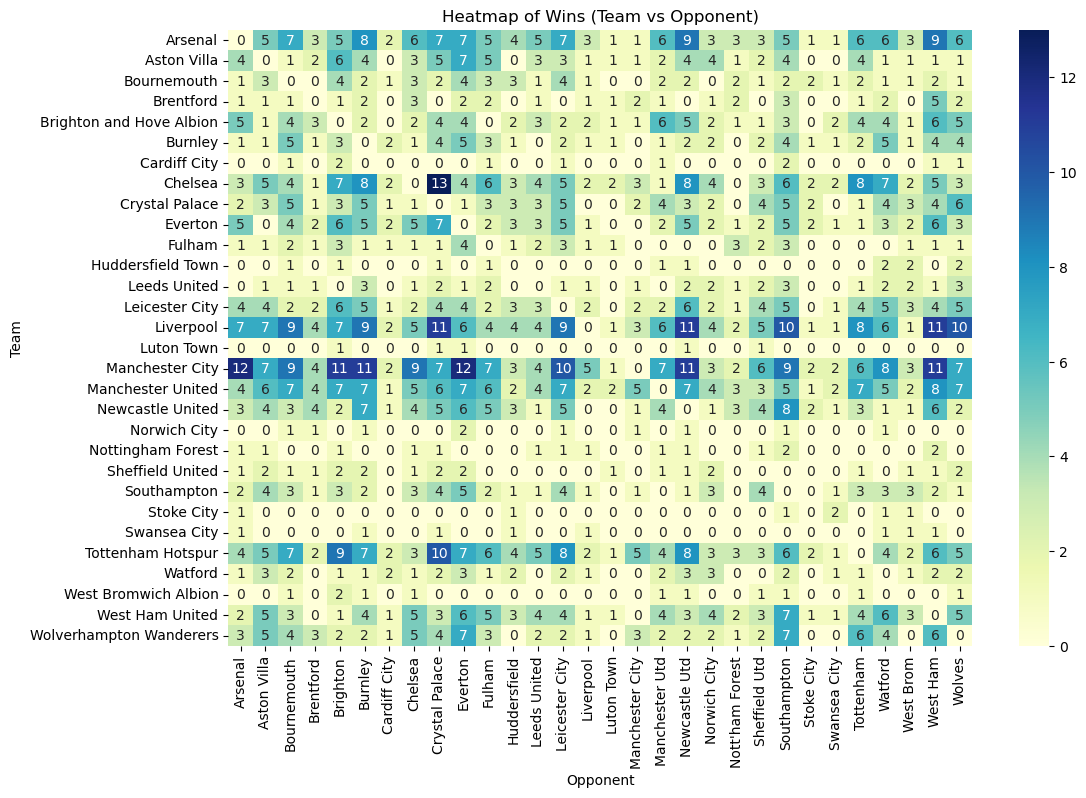

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('matches.csv')

matches['Date'] = pd.to_datetime(matches['Date'])

matches = matches[matches['Result'] == 'W']

win_counts = matches.pivot_table(index='Team', columns='Opponent', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(win_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Wins (Team vs Opponent)')
plt.ylabel('Team')
plt.xlabel('Opponent')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import binomtest

In [18]:
data = pd.read_csv('matches.csv')

## 2) To test the hypothesis that teams with higher shots have a greater win rate
We'll use a two-sample t-test to compare the means of the two groups. The null hypothesis (H0) is that there is no difference in the average number of shots between winning and non-winning games.

In [6]:
# Separate the data into games won and games not won
won_games = data[data['Result'] == 'W']
not_won_games = data[data['Result'] != 'W']

# Shots for won and not won games
shots_won = won_games['Sh']
shots_not_won = not_won_games['Sh']

In [7]:
# Perform the two-sample t-test
t_stat, p_value = ttest_ind(shots_won, shots_not_won, equal_var=False)  # Using Welch's t-test for unequal variances

# Output the test statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 19.215654077613184
P-value: 7.340245831593597e-79


c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


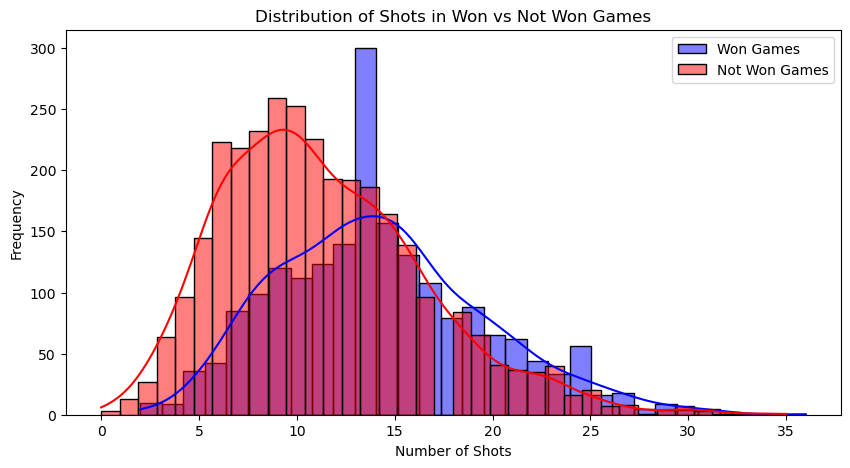

In [8]:
# Visualization of the shot distributions
plt.figure(figsize=(10, 5))
sns.histplot(shots_won, color="blue", kde=True, label='Won Games')
sns.histplot(shots_not_won, color="red", kde=True, label='Not Won Games')
plt.title('Distribution of Shots in Won vs Not Won Games')
plt.xlabel('Number of Shots')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The visualization shows the distribution of the number of shots for games that were won (blue) and not won (red). It's evident that games won tend to have a higher number of shots on average.

Here's what the statistical test tells us:

- Average shots in won games: Approximately 14.25
- Average shots in not won games: Approximately 11.31
The t-statistic is approximately 19.22, and the p-value is extremely small (about 7.340245831593597e-79)

This p-value is significantly less than any conventional significance level (e.g., 0.05), indicating strong evidence against the null hypothesis. Thus, we reject the null hypothesis and conclude that there is a statistically significant difference in the number of shots between games that are won and those that are not won. This supports the hypothesis that teams with higher shots have a greater win rate.

## 3) To test the hypothesis that teams playing at home lose less than 30% of the time
We'll use a binomial test to determine if the proportion of losses at home is significantly less than 30%. The null hypothesis (H0) is that the proportion of home losses is not less than 30%.

In [14]:
# Filter for home matches
home_matches = data[data['Venue'] == 'Home']

# Calculate losses at home
home_losses = (home_matches['Result'] == 'L').sum()
home_games = home_matches.shape[0]

# Create a new column for combined wins and draws
home_matches['Win/Draw'] = home_matches['Result'].apply(lambda x: 'Win/Draw' if x in ['W', 'D'] else 'Loss')

# Count the new category values and calculate percentages
combined_result_counts = home_matches['Win/Draw'].value_counts()
combined_result_percentages = combined_result_counts / combined_result_counts.sum() * 100


C:\Users\rishi\AppData\Local\Temp\ipykernel_42408\2009525934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_matches['Win/Draw'] = home_matches['Result'].apply(lambda x: 'Win/Draw' if x in ['W', 'D'] else 'Loss')


In [13]:
# Perform the binomial test for losses
# Null hypothesis: p >= 0.30
# Alternative hypothesis: p < 0.30 (one-sided test)
p_value_losses = binomtest(k=home_losses, n=home_games, p=0.30, alternative='less')

# Output the test results
print("P-value:", p_value_losses)
print("Number of home losses:", home_losses)
print("Total home games:", home_games)
print("Proportion of home losses:", home_losses / home_games)

P-value: BinomTestResult(k=829, n=2530, alternative='less', statistic=0.3276679841897233, pvalue=0.9988003648587171)
Number of home losses: 829
Total home games: 2530
Proportion of home losses: 0.3276679841897233


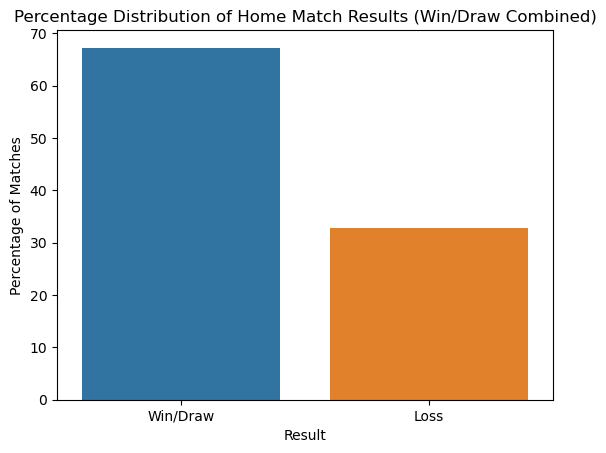

In [16]:
# Visualization for combined win/draw vs losses in percentage
sns.barplot(x=combined_result_percentages.index, y=combined_result_percentages.values)
plt.title('Percentage Distribution of Home Match Results (Win/Draw Combined)')
plt.xlabel('Result')
plt.ylabel('Percentage of Matches')
plt.show()

From the data:
- Total home games played: 2530
- Total home losses: 829

Proportion of home losses: approximately 32.77%.

The p-value from the binomial test is 0.999, which is very high. This means we fail to reject the null hypothesis at the conventional 0.05 significance level. Therefore, we do not have enough statistical evidence to support the claim that teams playing at home lose less than 30% of the time. The actual loss rate is slightly above 30%.

In [17]:
data['Formation']

0       4/3/2003
1       4/3/2003
2       4/3/2003
3       4/3/2003
4       4/3/2003
          ...   
5055     4-4-1-1
5056     4-4-1-1
5057     4-4-1-1
5058     4-4-1-1
5059     4-4-1-1
Name: Formation, Length: 5060, dtype: object